In [3]:
import pandas as pd
# Load full dataset
data_1 = pd.read_csv('merged_difference_cleaned_with_traits_and_values_cleaned_final_cleaned.csv')

# Select only needed columns
data_1_subset = data_1[['difference_mhi5', 'change_class', 'nomem_encr']]

# (Optional) Check
print(data_1_subset.head())
print(data_1_subset.shape)

# Save the subset to a new CSV file
data_1_subset.to_csv('merged_difference_subset.csv', index=False)

print("✅ Subset saved successfully as 'merged_difference_subset.csv'")


   difference_mhi5  change_class  nomem_encr
0             -4.0           0.0      800015
1             28.0           1.0      800100
2              4.0           0.0      800201
3              4.0           0.0      800228
4             -8.0          -1.0      800392
(995, 3)
✅ Subset saved successfully as 'merged_difference_subset.csv'


In [5]:
# Step 1: Load the files
df = pd.read_csv('social_demographic.csv')
data_1_subset = pd.read_csv('merged_difference_subset.csv')

# Step 2: Merge on 'nomem_encr'
merged_df = df.merge(data_1_subset, on='nomem_encr', how='left')

# Step 3: Define columns to drop
target_column_2022 = ['mhi5_class_2022']
possible_error_analysis_columns = [
    'gender', 'Religion', 'Religious_Membership',
    'political_interest', 'mhi5_std_score_2022',
    'gender.1', 'Ethnic_Background', 'social_media_frequency'
]
keep_columns = target_column_2022 + possible_error_analysis_columns

# Step 4: Drop those columns from merged dataframe
df_final = merged_df.drop(columns=keep_columns, errors='ignore')


# Step 2: Drop any rows with missing values (important ones only)
df_1= df_final.dropna()

# Step 3: Now split into X and y
X = df_1.drop(columns=['difference_mhi5', 'change_class'])
y = df_1['difference_mhi5']

# (Optional) Check
print(X.shape, y.shape)
print(X.isna().sum().sum(), "missing values in X")
print(y.isna().sum(), "missing values in y")



(891, 10) (891,)
0 missing values in X
0 missing values in y


In [7]:
# Minimum and maximum values
print("Minimum value in difference_mhi5:", y.min())
print("Maximum value in difference_mhi5:", y.max())

# (Optional) Also some more stats
print("\nSummary statistics:")
print(y.describe())


Minimum value in difference_mhi5: -72.0
Maximum value in difference_mhi5: 48.0

Summary statistics:
count    891.000000
mean       0.938272
std       11.490279
min      -72.000000
25%       -4.000000
50%        0.000000
75%        8.000000
max       48.000000
Name: difference_mhi5, dtype: float64


In [9]:
y.value_counts()


difference_mhi5
 0.0     203
 4.0     145
-4.0     121
 8.0      86
-8.0      66
 12.0     55
-12.0     35
 16.0     19
-16.0     18
 20.0     18
 24.0     17
-20.0     16
 32.0      9
-24.0      8
 28.0      8
-4.0       7
-8.0       5
 8.0       4
 36.0      4
-36.0      3
-8.0       3
-44.0      3
-32.0      3
-28.0      3
 12.0      3
 4.0       3
 12.0      2
 4.0       2
-4.0       2
-16.0      2
 16.0      2
-16.0      2
 16.0      1
 8.0       1
-36.0      1
-12.0      1
 48.0      1
 4.0       1
-72.0      1
-56.0      1
 16.0      1
-40.0      1
-12.0      1
-12.0      1
-12.0      1
 12.0      1
Name: count, dtype: int64

Low threshold (33%): -4.0
High threshold (66%): 4.0
1    0.400673
0    0.334456
2    0.264871
Name: proportion, dtype: float64
0    0
1    2
2    1
3    1
4    0
dtype: int32
✅ Plot saved as 'class_distribution_manual_thresholds_ifelse.png'


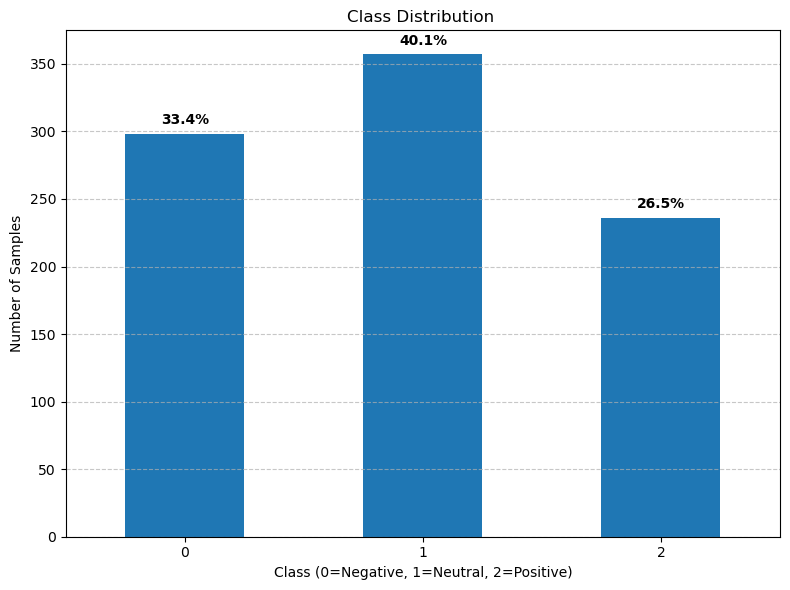

In [19]:
import numpy as np

# 1. Calculate quantile thresholds
low_thresh = y.quantile(1/3)
high_thresh = y.quantile(2/3)

print("Low threshold (33%):", low_thresh)
print("High threshold (66%):", high_thresh)

# 2. Apply classification directly with np.where
y_class = np.where(
    y <= low_thresh, 0,       # if y <= low_thresh → class 0 (Negative)
    np.where(
        y <= high_thresh, 1,  # else if y <= high_thresh → class 1 (Neutral)
        2                    # else → class 2 (Positive)
    )
)

# 3. Convert back to pandas Series (optional, for nicer use later)
y_class = pd.Series(y_class, index=y.index)

# 4. Check result
print(y_class.value_counts(normalize=True))
print(y_class.head())

# Calculate class counts
class_counts = y_class.value_counts().sort_index()

# Plotting (same as you posted)
fig, ax = plt.subplots(figsize=(8, 6))
class_counts.plot(kind='bar', ax=ax)

plt.xlabel("Class (0=Negative, 1=Neutral, 2=Positive)")
plt.ylabel("Number of Samples")
plt.title("Class Distribution ")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentages
total = class_counts.sum()
for i, value in enumerate(class_counts):
    percentage = f"{(value / total * 100):.1f}%"
    plt.text(i, value + 5, percentage, ha='center', va='bottom', fontweight='bold')

# Save the plot
plt.tight_layout()
plt.savefig("class_distribution_manual_thresholds_ifelse.png", dpi=300)
print("✅ Plot saved as 'class_distribution_manual_thresholds_ifelse.png'")

plt.show()


### ***Split data***
